In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
#Load the Dataset
# Reading the dataset
titanic_data = pd.read_csv(r'C:\Users\HP\Desktop\Codsoft\Data Science\Titanic Dataset\tested.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
# Display basic information about the dataset
print("Basic Information:")
print(titanic_data.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [8]:
# Display descriptive statistics for numerical data
print("\nDescriptive Statistics for Numerical Data:")
print(titanic_data.describe())


Descriptive Statistics for Numerical Data:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [9]:
# Display descriptive statistics for categorical data
print("\nDescriptive Statistics for Categorical Data:")
print(titanic_data.describe(include=['O']))


Descriptive Statistics for Categorical Data:
                    Name   Sex    Ticket            Cabin Embarked
count                418   418       418               91      418
unique               418     2       363               76        3
top     Kelly, Mr. James  male  PC 17608  B57 B59 B63 B66        S
freq                   1   266         5                3      270


In [10]:
# Checking for missing values in the dataset
print("\nMissing Values in Each Column:")
missing_values = titanic_data.isnull().sum()
print(missing_values)


Missing Values in Each Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64



Histograms for Numerical Data:


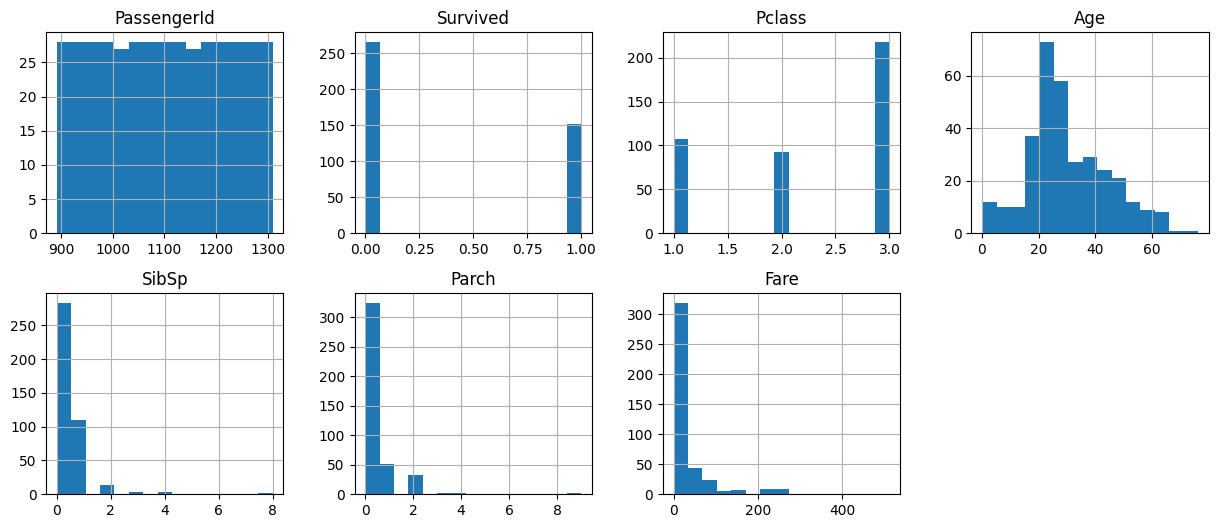

In [11]:
# Histograms for numerical data
print("\nHistograms for Numerical Data:")
titanic_data.hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()


Boxplots for Numerical Data:


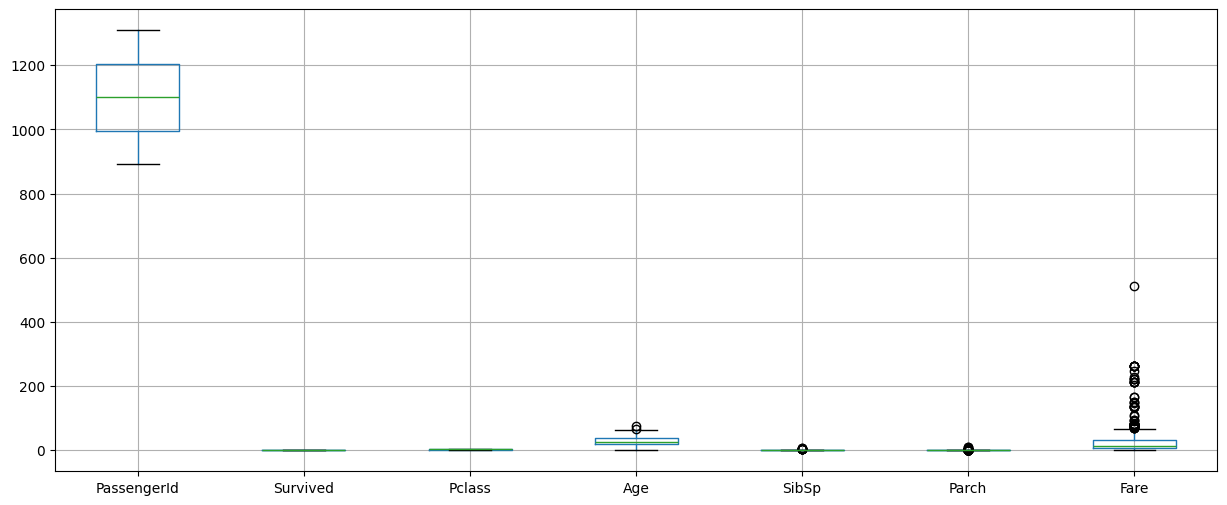

In [12]:
# Boxplots for numerical data
print("\nBoxplots for Numerical Data:")
titanic_data.boxplot(figsize=(15, 6))
plt.show()


Bar Charts for Categorical Data:


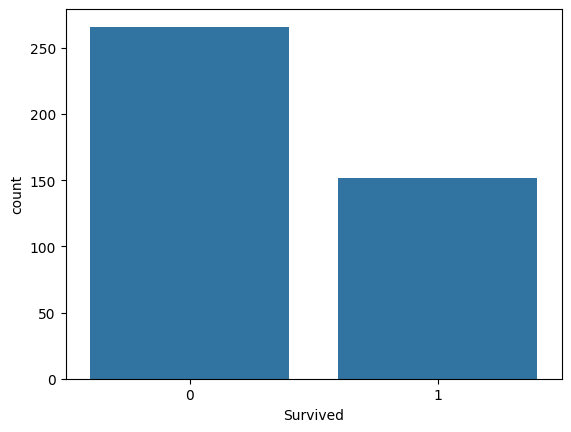

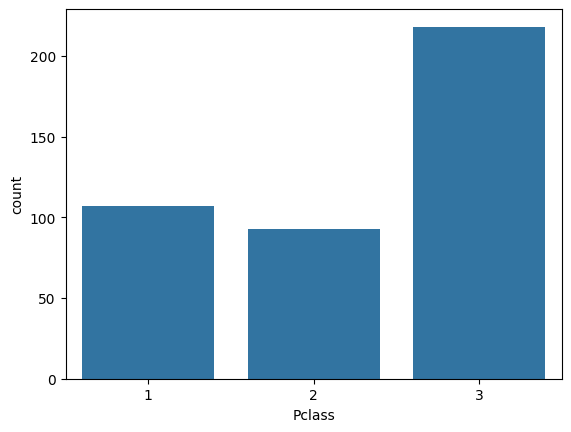

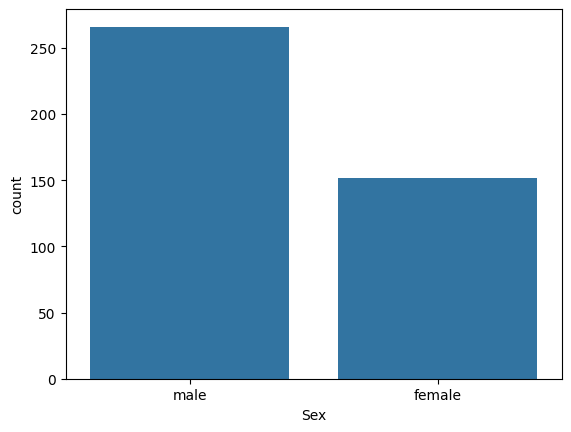

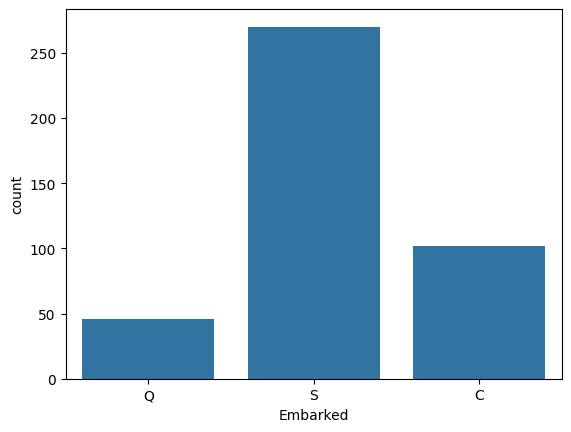

In [13]:
# Bar charts for categorical data
print("\nBar Charts for Categorical Data:")
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']
for column in categorical_columns:
    sns.countplot(x=column, data=titanic_data)
    plt.show()

In [15]:
# Handling Missing Values
# Imputing missing 'Age' and 'Fare' with median values
imputer_age_fare = SimpleImputer(strategy='median')
titanic_data[['Age', 'Fare']] = imputer_age_fare.fit_transform(titanic_data[['Age', 'Fare']])

# For 'Cabin', creating a binary feature indicating whether Cabin info is missing
titanic_data['Cabin_Unknown'] = titanic_data['Cabin'].isnull().astype(int)

# Feature Engineering
# Extracting titles from the 'Name' column
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Dropping columns that are less likely to be useful for prediction
titanic_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Checking the dataset after these operations
titanic_data.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Unknown,Title
0,0,3,male,34.5,0,0,7.8292,Q,1,Mr
1,1,3,female,47.0,1,0,7.0000,S,1,Mrs
2,0,2,male,62.0,0,0,9.6875,Q,1,Mr
3,0,3,male,27.0,0,0,8.6625,S,1,Mr
4,1,3,female,22.0,1,1,12.2875,S,1,Mrs


In [16]:
# Identifying categorical and numerical features
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Cabin_Unknown']

# Setting up the ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # Leave other columns untouched
)

# Applying the ColumnTransformer to the dataset
titanic_transformed = column_transformer.fit_transform(titanic_data)

# Checking the shape of the transformed data
titanic_transformed.shape



(418, 23)

In [17]:
# Separating features and target variable
X = titanic_transformed
y = titanic_data['Survived']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((334, 23), (84, 23), (334,), (84,))

In [18]:
# Initializing the models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100)
svm = SVC()

# Dictionary to hold the models and their names
models = {
    'Logistic Regression': log_reg, 
    'Random Forest': random_forest, 
    'SVM': svm
}

# Performing cross-validation for each model
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = np.mean(scores)

cv_results



{'Logistic Regression': 1.0, 'Random Forest': 1.0, 'SVM': 0.9849841700587969}

In [19]:

# Function to evaluate a model on the test set
def evaluate_model(model, X_test, y_test):
    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Calculating various metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

    return metrics

# Training each model on the entire training set and evaluating on the test set
test_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Training the model
    test_results[name] = evaluate_model(model, X_test, y_test)  # Evaluating the model

test_results



{'Logistic Regression': {'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0},
 'Random Forest': {'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0},
 'SVM': {'accuracy': 0.9880952380952381,
  'precision': 1.0,
  'recall': 0.9705882352941176,
  'f1': 0.9850746268656716}}